Saving Crop_recommendation.csv to Crop_recommendation (5).csv


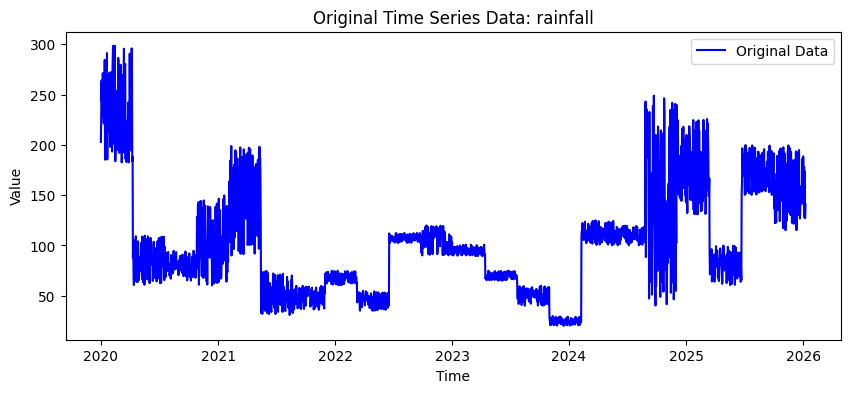

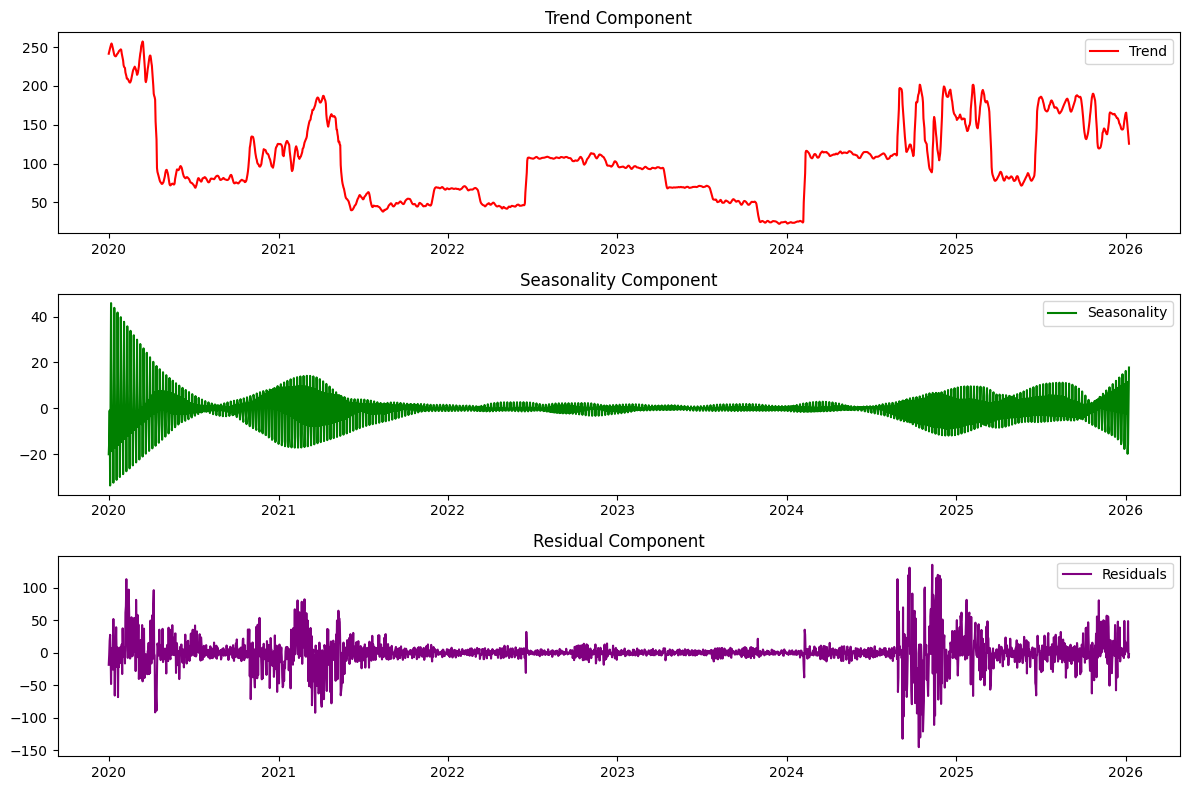


Trend Sample:
 Date
2026-01-04    153.517953
2026-01-05    146.999499
2026-01-06    140.188421
2026-01-07    133.042420
2026-01-08    125.576507
Name: trend, dtype: float64

Seasonality Sample:
 Date
2026-01-04    11.513146
2026-01-05   -19.794404
2026-01-06   -15.592670
2026-01-07     1.761364
2026-01-08    17.800543
Name: season, dtype: float64

Residual Sample:
 Date
2026-01-04    12.743409
2026-01-05     0.719515
2026-01-06    48.727088
2026-01-07    -7.628491
2026-01-08    -2.440009
Name: resid, dtype: float64


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from google.colab import files

# Step 1: Upload the CSV File
uploaded = files.upload()

# Get the uploaded file name dynamically
file_name = list(uploaded.keys())[0]

# Step 2: Load the Dataset
df = pd.read_csv(file_name)

# Step 3: Create a Fake Time Index (Simulating Daily Data)
df['Date'] = pd.date_range(start="2020-01-01", periods=len(df), freq='D')
df.set_index('Date', inplace=True)

# Step 4: Select a Time Series Column (Rainfall)
column_name = "rainfall"
if column_name not in df.columns:
    raise ValueError(f"Column '{column_name}' not found in dataset. Available columns: {df.columns}")

time_series = df[column_name]

# Step 5: Define an Odd Seasonal Period (e.g., 29)
period = 29  # Must be an odd number ≥ 3

# Step 6: Plot Original Data
plt.figure(figsize=(10, 4))
plt.plot(time_series, label="Original Data", color='blue')
plt.title(f"Original Time Series Data: {column_name}")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

# Step 7: Apply Time Series Decomposition
stl = STL(time_series, seasonal=period, robust=True)
result = stl.fit()

# Step 8: Plot the Decomposed Components
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(result.trend, label="Trend", color="red")
plt.title("Trend Component")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(result.seasonal, label="Seasonality", color="green")
plt.title("Seasonality Component")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(result.resid, label="Residuals", color="purple")
plt.title("Residual Component")
plt.legend()

plt.tight_layout()
plt.show()

# Step 9: Display Sample Values
print("\nTrend Sample:\n", result.trend.tail())
print("\nSeasonality Sample:\n", result.seasonal.tail())
print("\nResidual Sample:\n", result.resid.tail())
